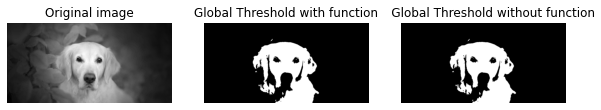

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title('Original image')

ret,th1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
plt.subplot(3,3,2)
plt.imshow(th1,cmap='gray')
plt.axis("off")
plt.title('Global Threshold with function')

def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img
def thres_finder(img, thres=20,delta_T=1.0):

    x_low, y_low = np.where(img<=thres)
    x_high, y_high = np.where(img>thres)

    mean_low = np.mean(img[x_low,y_low])
    mean_high = np.mean(img[x_high,y_high])

    new_thres = (mean_low + mean_high)/2
   
    if abs(new_thres-thres)< delta_T:
         return new_thres
    else:
        return thres_finder(img, thres=new_thres,delta_T=1.0)

vv1 = thres_finder(img, thres=30,delta_T=1.0)
  
ret, thresh = cv2.threshold(img,vv1,255,cv2.THRESH_BINARY)
out = cv2.hconcat([img,thresh])
plt.subplot(3,3,3)
plt.imshow(th1,cmap='gray')
plt.axis("off")
plt.title('     Global Threshold without function')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

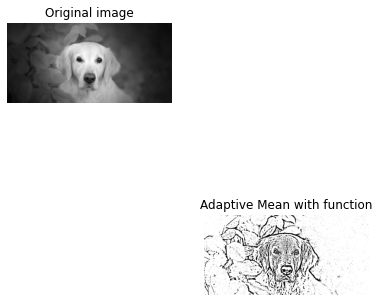

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title('Original image')

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.subplot(3,3,5)
plt.imshow(th2,cmap='gray')
plt.axis("off")
plt.title('Adaptive Mean with function')
plt.show()

number = 1
class adaptive_threshold:
   
    def __init__(self,image):
        image =cv2.imread("a.jpg")
        self.input_image = cv2.resize(image,(256,196))
        self.height,self.width,_ = self.input_image.shape    
        self.sample_window_1 = self.width/12
        self.sample_window_2 = self.sample_window_1/2
        self.threshold = 68
        self.integrated_image = np.zeros_like(self.input_image, dtype=np.uint32)
        self.output_image = np.zeros_like(self.input_image)
        self.main()
   
    def integrate_image(self):
        for column in range(self.width):
            for row in range(self.height):
                self.integrated_image[row,column] = self.input_image[0:row,0:column].sum()
   
    def the_algorithm(self):
        for column in range(self.width):
            for row in range(self.height):
                y1 = round(max(row-self.sample_window_2,0))
                y2 = round(min(row+self.sample_window_2, self.height-1))
                x1 = round(max(column-self.sample_window_2,0))
                x2 = round(min(column+self.sample_window_2,self.width-1))
               
                count = (y2-y1)*(x2-x1)
               
                total = self.integrated_image[y2,x2]-self.integrated_image[y1,x2]-self.integrated_image[y2,x1]+self.integrated_image[y1,x1]          
               
                if np.all(self.input_image[row,column]*count < total*(100-self.threshold)/100):
                    self.output_image[row,column] = 0
                else:
                    self.output_image[row,column] = 255
           
    def main(self):
        self.integrate_image()
        self.the_algorithm()
        self.display_save()        
       
    def display_save(self):
        global number
        cv2.imshow('Adaptive thresh without function',self.output_image)
        filename = 'output-'+str(number)+'.jpg'
        cv2.imwrite(filename,self.output_image)
        number+=1
        key = cv2.waitKey(0)

image1 = cv2.imread('testImage0.pgm')
image2 = cv2.imread('testImage1.pgm')
filter_ = adaptive_threshold(image1)
filter_ = adaptive_threshold(image2)